# Logistic distribution example

With some code to so symbolic math in python

Import libraries

In [1]:
# numpy for math
import numpy as np
# numpy for plotting
import matplotlib.pyplot as plt
# sympy for symbolic math
import sympy as sym

# get statistical functions from scipy. In this case, the logistic distribution
from scipy.stats import logistic

## Classic way of representing $P(-1 \leq X \leq 1)$ when $X \sim$Logistic

Define functions

In [2]:
def F(x):
    return np.exp(x)/(1+np.exp(x))
def f(x):
    return np.exp(x)/(1+np.exp(x))**2

Check

In [3]:
F(1)-F(-1)

0.4621171572600098

Plot

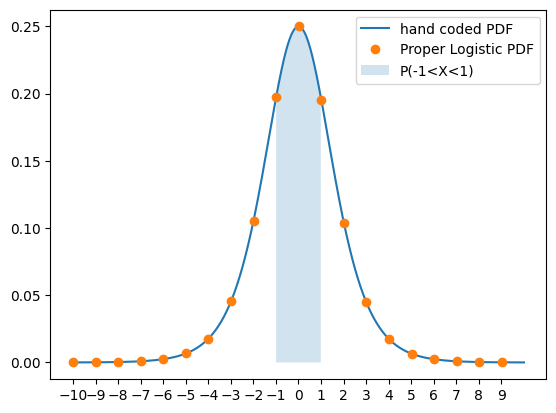

In [4]:
x_range = np.linspace(-10,10,1000)
plt.plot(x_range,f(x_range),label='hand coded PDF')
plt.plot(x_range,logistic.pdf(x_range),markevery=50,marker='o',lw=0.01,label='Proper Logistic PDF')
plt.fill_between(x_range[abs(x_range)-1<0],f(x_range[abs(x_range)-1<0]),alpha=0.2,label='P(-1<X<1)')
plt.xticks(np.arange(-10,10,1))
plt.legend()
plt.show()

## An example with symbolic python

Too lazy to take derivatives? Python got you covered.

In [6]:
# Declare symbolic variables
x = sym.var("x")

# Write symbolic expression for F
F_sym = sym.exp(x)/(1+sym.exp(x))
F_sym

exp(x)/(exp(x) + 1)

In [7]:
# Take a derivative
F_sym.diff(x)

exp(x)/(exp(x) + 1) - exp(2*x)/(exp(x) + 1)**2

In [8]:
# Too ugly? simplify!
F_sym.diff(x).simplify()

exp(x)/(exp(2*x) + 2*exp(x) + 1)

In [9]:
# Nice, but can you make it executable? First argument is the variable, second the expression
F_exe = sym.lambdify(x,F_sym)

In [10]:
# Check
F_exe(1), F(1)

(0.7310585786300049, 0.7310585786300049)